In [1]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('E:\\CODE\\python\\Machine_learning\\bt_21_11\\archive\\diabetes.csv')
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

- Pregnancies (Số lần mang thai)
- Glucose (Nồng độ đường huyết)
- BloodPressure (Huyết áp)
- SkinThickness (Độ dày da)
- Insulin
- Insulin trung bình là khoảng 79.80.
- BMI (Chỉ số khối cơ thể):
- DiabetesPedigreeFunction (Hệ số di truyền tiểu đường):
- Age (Tuổi):
- Outcome (Kết quả):
- Khoảng 35% mẫu trong tập dữ liệu có kết quả là 1 (tiểu đường), vì giá trị trung bình của cột "Outcome" là 0.35.

# EDA

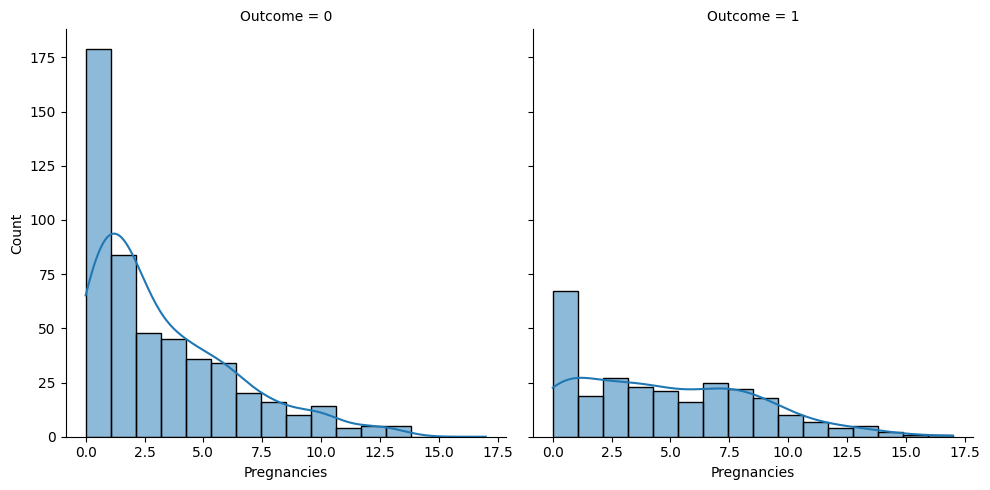

In [15]:
sns.displot(data=df, x="Pregnancies", col = "Outcome",kde = True)

# Chia dữ liệu

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.8362943 , -0.80005088, -0.53576428, ..., -1.06015343,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365, ...,  0.64646721,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566, ...,  1.35537117,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.6143464 ,  0.90248622, ...,  1.78859026,
         1.94892066,  0.42190587],
       [-1.14304979,  0.62368349, -3.8548039 , ...,  1.36849903,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.12847154,  1.45565949, ..., -1.24394334,
        -0.60836445, -1.03426754]])

# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [147]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred))
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("recall_score: ", metrics.recall_score(y_test, y_pred))
print("precision_score: ", metrics.precision_score(y_test, y_pred))


confusion_matrix: 
 [[120  31]
 [ 30  50]]
accuracy_score:  0.7359307359307359
f1_score:  0.6211180124223602
recall_score:  0.625
precision_score:  0.6172839506172839


# Decision Tree

In [148]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01)
clf1 = clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [149]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       151
           1       0.69      0.34      0.45        80

    accuracy                           0.72       231
   macro avg       0.71      0.63      0.63       231
weighted avg       0.71      0.72      0.69       231



In [150]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred1))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred1))
print("f1_score: ", metrics.f1_score(y_test, y_pred1))
print("recall_score: ", metrics.recall_score(y_test, y_pred1))
print("precision_score: ", metrics.precision_score(y_test, y_pred1))


confusion_matrix: 
 [[139  12]
 [ 53  27]]
accuracy_score:  0.7186147186147186
f1_score:  0.45378151260504196
recall_score:  0.3375
precision_score:  0.6923076923076923


# MLP

In [151]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes=(10), max_iter=500).fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [152]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       151
           1       0.64      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [153]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred2))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred2))
print("f1_score: ", metrics.f1_score(y_test, y_pred2))
print("recall_score: ", metrics.recall_score(y_test, y_pred2))
print("precision_score: ", metrics.precision_score(y_test, y_pred2))


confusion_matrix: 
 [[124  27]
 [ 31  49]]
accuracy_score:  0.7489177489177489
f1_score:  0.6282051282051283
recall_score:  0.6125
precision_score:  0.6447368421052632


# SVM

In [154]:
from sklearn import svm
clf3 = svm.SVC()
clf3 = clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [155]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [156]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred3))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred3))
print("f1_score: ", metrics.f1_score(y_test, y_pred3))
print("recall_score: ", metrics.recall_score(y_test, y_pred3))
print("precision_score: ", metrics.precision_score(y_test, y_pred3))


confusion_matrix: 
 [[125  26]
 [ 33  47]]
accuracy_score:  0.7445887445887446
f1_score:  0.6143790849673203
recall_score:  0.5875
precision_score:  0.6438356164383562


# PCA

In [164]:
X.shape

(768, 8)

In [157]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X)
X_pca.shape


(768, 5)

In [158]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=30)


In [161]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=300).fit(X_train_pca, y_train_pca)
y_pred = clf.predict(X_test_pca)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [162]:
from sklearn import metrics
print("confusion_matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("accuracy_score: ", metrics.accuracy_score(y_test, y_pred))
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("recall_score: ", metrics.recall_score(y_test, y_pred))
print("precision_score: ", metrics.precision_score(y_test, y_pred))


confusion_matrix: 
 [[118  33]
 [ 53  27]]
accuracy_score:  0.6277056277056277
f1_score:  0.3857142857142857
recall_score:  0.3375
precision_score:  0.45
